In [0]:
!pip install ipython-autotime
%load_ext autotime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import math
import itertools
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:20,.2f}'.format
data = pd.read_csv('new_file_emi.csv')

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.93 s


In [0]:
data.set_index('lead_id', inplace=True)
data = data[data['dmi_cibil_score'] > 399]
data.drop(['dmi_cibil_score'], axis = 1, inplace=True)
data = data[(data['salary'] > 6000) & (data['salary'] < 500000) & (~data.salary.isin([50000,100000,150000,200000]))]
original_data = data.copy()
print("sample count",len(data.index))

sample count 5412
time: 36.5 ms


sample count 5412
sample count 4996
loan_total_total:-  0.3770709120353541
emi_total_total:-  0.08909765875163787
model score : 0.009869282757800411


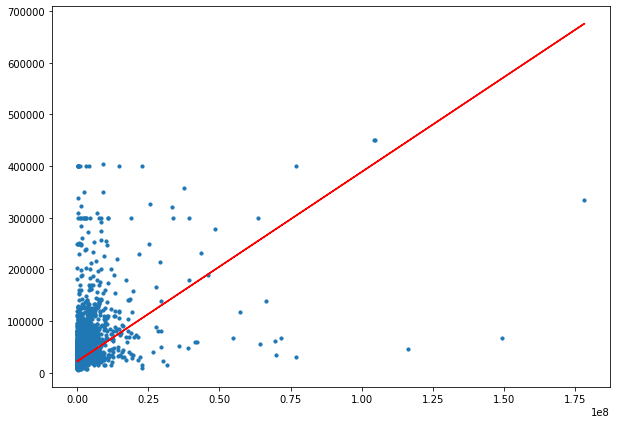

,other_emi_total,other_emi_max,other_emi_count,auto(p)_emi_total,auto(p)_emi_max,auto(p)_emi_count,housing_emi_total,housing_emi_max,housing_emi_count,property_emi_total,property_emi_max,property_emi_count,againstsecurity_emi_total,againstsecurity_emi_max,againstsecurity_emi_count,personal_emi_total,personal_emi_max,personal_emi_count,consumer_emi_total,consumer_emi_max,consumer_emi_count,gold_emi_total,gold_emi_max,gold_emi_count,education_emi_total,education_emi_max,education_emi_count,toprofessional_emi_total,toprofessional_emi_max,toprofessional_emi_count,twowheeler_emi_total,twowheeler_emi_max,twowheeler_emi_count,againstdeposit_emi_total,againstdeposit_emi_max,againstdeposit_emi_count,commercialvehicle_emi_total,commercialvehicle_emi_max,commercialvehicle_emi_count,usedcar_emi_total,usedcar_emi_max,usedcar_emi_count,mudra_emi_total,mudra_emi_max,mudra_emi_count,generalbusiness_emi_total,generalbusiness_emi_max,generalbusiness_emi_count,prioritybusiness_emi_total,prioritybusiness_emi_max,prioritybusiness_emi_count,unsecuredbusiness_emi_total,unsecuredbusiness_emi_max,unsecuredbusiness_emi_count
lead_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10122,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"12,360.00","12,360.00",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10654,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"2,137.00","2,137.00",nan,"1,328.00","1,328.00",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
11078,nan,nan,nan,nan,nan,nan,"6,000.00","6,000.00",nan,"2,925.00","2,925.00",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
11102,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
11107,nan,nan,nan,nan,nan,nan,"18,894.00","18,894.00",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


time: 837 ms


In [0]:
data = original_data.copy()
print("sample count",len(data.index))
data['loan_total_total'] = data.filter(like='_loan_total').sum(axis=1)
data['loan_total_max'] = data.filter(like='_loan_total').max(axis=1)
data['loan_max_total'] = data.filter(like='_loan_max').sum(axis=1)
data['loan_max_max'] = data.filter(like='_loan_max').max(axis=1)
data['emi_total_total'] = data.filter(like='_emi_total').sum(axis=1)
data['emi_total_max'] = data.filter(like='_emi_total').max(axis=1)
data['emi_max_total'] = data.filter(like='_emi_max').sum(axis=1)
data['emi_max_max'] = data.filter(like='_emi_max').max(axis=1)
data = data[(data['loan_total_total']< 500000000) & (data['loan_total_total'] >= 1000)]
cols = data.columns[data.columns.str.contains('_loan_')]
data[cols] = data[cols].mask(data[cols] < 1000)
cols = data.columns[data.columns.str.contains('_emi_')]
data[cols] = data[cols].mask(data[cols] < 100)
print("sample count",len(data.index))
print("loan_total_total:- ",data['loan_total_total'].corr(data['salary']))
print("emi_total_total:- ",data['emi_total_total'].corr(data['salary']))
x_train = data[['loan_total_total']]
y_train = data[['salary']]
model = linear_model.RANSACRegressor(linear_model.LinearRegression())
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()
# data = data[['salary','loans_total_total','loans_total_max','loans_max_total','loans_max_max','housing_loan_max', 'housing_loan_total','emi_total_total','emi_total_max','emi_max_total','emi_max_max','housing_emi_max', 'housing_emi_total']]
# data.to_csv('with_total.csv')
backup_data = data.copy()
data[cols].head()

In [0]:
data = backup_data.copy()
data['predicted_category'] = "low"
data['salary_category'] = data['salary'].apply(lambda x: "low" if x<20000 else ("medium" if x<40000 else "high"))
# data = data[data['housing_loan_max']> 10000]
loan_list = ['loan_total_total','loan_max_total','loan_total_max','loan_max_max','housing_loan_max', 'housing_loan_total','property_loan_max', 'property_loan_total','personal_loan_max', 'personal_loan_total','auto(p)_loan_total','auto(p)_loan_max','other_loan_total','other_loan_max']
emi_list = ['emi_total_total','emi_max_total','emi_total_max','emi_max_max','housing_emi_max', 'housing_emi_total','property_emi_max', 'property_emi_total','personal_emi_max', 'personal_emi_total','auto(p)_emi_total','auto(p)_emi_max','other_emi_total','other_emi_max']
card_list = ['credit_card_total','credit_card_max']
col_list = loan_list + emi_list + card_list
# col_list = ['credit_card_max']
i=80
j=40
k=80
l=40
m=80
n=40
o=80
p=40
q=80
r=40
s=80
t=40
data = data[data['loan_total_total']>10000]
data.loc[data['loan_total_total'] > np.percentile(data[data['loan_total_total'] > 1000]['loan_total_total'],j), 'predicted_category'] = "medium"
data.loc[data['housing_loan_max'] > np.percentile(data[data['housing_loan_max'] > 1000]['housing_loan_max'],l), 'predicted_category'] = "medium"
data.loc[data['personal_loan_max'] > np.percentile(data[data['personal_loan_max'] > 1000]['personal_loan_max'],n), 'predicted_category'] = "medium"
data.loc[data['auto(p)_loan_max'] > np.percentile(data[data['auto(p)_loan_max'] > 1000]['auto(p)_loan_max'],p), 'predicted_category'] = "medium"
data.loc[data['other_loan_max'] > np.percentile(data[data['other_loan_max'] > 1000]['other_loan_max'],r), 'predicted_category'] = "medium"
data.loc[data['credit_card_max'] > np.percentile(data[data['credit_card_max'] > 1000]['credit_card_max'],t), 'predicted_category'] = "medium"

data.loc[data['loan_total_total'] > np.percentile(data[data['loan_total_total'] > 100]['loan_total_total'], i), 'predicted_category'] = "high"
data.loc[data['housing_loan_max'] > np.percentile(data[data['housing_loan_max'] > 100]['housing_loan_max'], k), 'predicted_category'] = "high"
data.loc[data['personal_loan_max'] > np.percentile(data[data['personal_loan_max'] > 100]['personal_loan_max'], m), 'predicted_category'] = "high"
data.loc[data['auto(p)_loan_max'] > np.percentile(data[data['auto(p)_loan_max'] > 100]['auto(p)_loan_max'], o), 'predicted_category'] = "high"
data.loc[data['other_loan_max'] > np.percentile(data[data['other_loan_max'] > 100]['other_loan_max'], q), 'predicted_category'] = "high"
data.loc[data['credit_card_max'] > np.percentile(data[data['credit_card_max'] > 1000]['credit_card_max'], s), 'predicted_category'] = "high"

data['check_result'] = np.where(data['predicted_category'] == data['salary_category'],1, 0)
print(len(data.index))
print(data['check_result'].sum() * 100 / len(data.index))
print(len(data[data['predicted_category'] == 'high']), data[data['predicted_category'] == 'high']['check_result'].sum() * 100 / len(data[data['predicted_category'] == 'high'].index))
print(len(data[data['predicted_category'] == 'medium']), data[data['predicted_category'] == 'medium']['check_result'].sum() * 100 / len(data[data['predicted_category'] == 'medium'].index))
print(len(data[data['predicted_category'] == 'low']), data[data['predicted_category'] == 'low']['check_result'].sum() * 100 / len(data[data['predicted_category'] == 'low'].index))

4892
52.24856909239575
1556 62.01799485861183
1918 58.34202294056308
1418 33.286318758815234
time: 139 ms


In [0]:
data = backup_data.copy()
data['predicted_category'] = "low"
data['salary_category'] = data['salary'].apply(lambda x: "low" if x<20000 else ("medium" if x<40000 else "high"))
loan_list = ['loan_total_total','housing_loan_max','property_loan_max','personal_loan_max','auto(p)_loan_max','other_loan_max']
emi_list = ['emi_total_total','housing_emi_max','property_emi_max','personal_emi_max','auto(p)_emi_max','other_emi_max']
card_list = ['credit_card_total','credit_card_max']
col_list = loan_list + emi_list + card_list
col_list = ['loan_total_total']
result = pd.DataFrame(columns=['counter','accuracy'])
rows_list = []
c = 0
for i in range(80,90,2):
  for j in range(50,70,4):
    for k in range(80,90,2):
      for l in range(50,70,4):
        for m in range(80,90,2):
          for n in range(50,70,4):
            for o in range(80,90,2):
              for p in range(50,70,4):
                for q in range(80,90,2):
                  for r in range(50,70,4):
                    for s in range(80,90,2):
                      for t in range(50,70,4):
                        data['predicted_category'] = "low"
                        
                        data.loc[data['loan_total_total'] > np.percentile(data[data['loan_total_total'] > 10000]['loan_total_total'],j), 'predicted_category'] = "medium"
                        data.loc[data['housing_loan_max'] > np.percentile(data[data['housing_loan_max'] > 10000]['housing_loan_max'],l), 'predicted_category'] = "medium"
                        data.loc[data['personal_loan_max'] > np.percentile(data[data['personal_loan_max'] > 10000]['personal_loan_max'],n), 'predicted_category'] = "medium"
                        data.loc[data['auto(p)_loan_max'] > np.percentile(data[data['auto(p)_loan_max'] > 10000]['auto(p)_loan_max'],p), 'predicted_category'] = "medium"
                        data.loc[data['other_loan_max'] > np.percentile(data[data['other_loan_max'] > 10000]['other_loan_max'],r), 'predicted_category'] = "medium"
                        data.loc[data['credit_card_max'] > np.percentile(data[data['credit_card_max'] > 1000]['credit_card_max'],t), 'predicted_category'] = "medium"
                        
                        data.loc[data['loan_total_total'] > np.percentile(data[data['loan_total_total'] > 10000]['loan_total_total'], i), 'predicted_category'] = "high"
                        data.loc[data['housing_loan_max'] > np.percentile(data[data['housing_loan_max'] > 10000]['housing_loan_max'], k), 'predicted_category'] = "high"
                        data.loc[data['personal_loan_max'] > np.percentile(data[data['personal_loan_max'] > 10000]['personal_loan_max'], m), 'predicted_category'] = "high"
                        data.loc[data['auto(p)_loan_max'] > np.percentile(data[data['auto(p)_loan_max'] > 10000]['auto(p)_loan_max'], o), 'predicted_category'] = "high"
                        data.loc[data['other_loan_max'] > np.percentile(data[data['other_loan_max'] > 10000]['other_loan_max'], q), 'predicted_category'] = "high"
                        data.loc[data['credit_card_max'] > np.percentile(data[data['credit_card_max'] > 1000]['credit_card_max'], s), 'predicted_category'] = "high"

                        data['check_result'] = np.where(data['predicted_category'] == data['salary_category'],1, 0)
                        # h1 = len(data[data['predicted_category'] == 'high'])
                        # h2 = data[data['predicted_category'] == 'high']['check_result'].sum() * 100 / len(data[data['predicted_category'] == 'high'].index)
                        # m1 = len(data[data['predicted_category'] == 'medium'])
                        # m2 = data[data['predicted_category'] == 'medium']['check_result'].sum() * 100 / len(data[data['predicted_category'] == 'medium'].index)
                        # l1 = len(data[data['predicted_category'] == 'low'])
                        # l2 = data[data['predicted_category'] == 'low']['check_result'].sum() * 100 / len(data[data['predicted_category'] == 'low'].index)
                        # dict1 = {"i":i,"j":j,"k":k,"l":l,"m":m,"n":n,"o":o,"p":p,"q":q,"r":r,"s":s,"t":t,"value":data['check_result'].sum() * 100 / len(data.index),"h_count":h1,"h_acc":h2,"m_count":m1, "m_acc":m2,"l_count":l1,"l_acc":l2}
                        # rows_list.append(dict1)
                        if c < data['check_result'].sum() * 100 / len(data.index):
                          c = data['check_result'].sum() * 100 / len(data.index)

# df = pd.DataFrame(rows_list)

print(c)

In [0]:
data = backup_data.copy()
print(len(data.index))
data['predicted_category'] = "low"
data['salary_category'] = data['salary'].apply(lambda x: 0 if x<20000 else (1 if x<40000 else 2))
l0 = 'loan_total_total'
l1 = 'housing_loan_max'
l2 = 'property_loan_max'
l3 = 'personal_loan_max'
l4 = 'auto(p)_loan_max'
l5 = 'consumer_loan_max'
l6 = 'gold_loan_max'
l7 = 'education_loan_max'
l8 = 'twowheeler_loan_max'
l9 = 'againstdeposit_loan_max'
l10 = 'commercialvehicle_loan_max'
l11 = 'usedcar_loan_max'
l12 = 'generalbusiness_loan_max'
l13 = 'prioritybusiness_loan_max'
l14 = 'other_loan_max'
c1 = 'credit_card_max'
e0 = 'loan_total_total'
e1 = 'housing_loan_max'
e2 = 'property_loan_max'
e3 = 'personal_loan_max'
e4 = 'auto(p)_loan_max'
e5 = 'consumer_loan_max'
e6 = 'gold_loan_max'
e7 = 'education_loan_max'
e8 = 'twowheeler_loan_max'
e9 = 'againstdeposit_loan_max'
e10 = 'commercialvehicle_loan_max'
e11 = 'usedcar_loan_max'
e12 = 'generalbusiness_loan_max'
e13 = 'prioritybusiness_loan_max'
e14 = 'other_loan_max'
c2 = 'overdraft_max'
c = 0
for i,ei in itertools.product(range(55,65,5),range(55,65,5)):
  p_i = np.nanpercentile(data[l1],i)
  p_ei = np.nanpercentile(data[e1],ei)
  for j,ej in itertools.product(range(55,65,5),range(55,65,5)):
    p_j = np.nanpercentile(data[l2],j)
    p_ej = np.nanpercentile(data[e2],ej)
    for k,ek in itertools.product(range(80,81,5),range(80,81,5)):
      p_k = np.nanpercentile(data[l3],k)
      p_ek = np.nanpercentile(data[e3],ek)
      for l,el in itertools.product(range(70,75,5),range(70,75,5)):
        p_l = np.nanpercentile(data[l4],l)
        p_el = np.nanpercentile(data[e4],el)
        for m,em in itertools.product(range(99,100,1),range(99,100,1)):
          p_m = np.nanpercentile(data[l5],m)
          p_em = np.nanpercentile(data[e5],em)
          for n,en in itertools.product(range(85,86,4),range(85,86,4)):
            p_n = np.nanpercentile(data[l6],n)
            p_en = np.nanpercentile(data[e6],en)
            for o,eo in itertools.product(range(70,75,5),range(70,75,5)):
              p_o = np.nanpercentile(data[l7],o)
              p_eo = np.nanpercentile(data[e7],eo)
              for p,ep in itertools.product(range(100,101,1),range(100,101,1)):
                p_p = np.nanpercentile(data[l8],p)
                p_ep = np.nanpercentile(data[e8],ep)
                for q,eq in itertools.product(range(80,85,5),range(80,85,5)):
                  p_q = np.nanpercentile(data[l9],q)
                  p_eq = np.nanpercentile(data[e9],eq)
                  for r,er in itertools.product(range(80,85,5),range(80,85,5)):
                    p_r = np.nanpercentile(data[l10],r)
                    p_er = np.nanpercentile(data[e0],er)
                    for s,es in itertools.product(range(75,80,5),range(75,80,5)):
                      p_s = np.nanpercentile(data[l11],s)
                      p_es = np.nanpercentile(data[e11],es)
                      for t,et in itertools.product(range(80,85,5),range(80,85,5)):
                        p_t = np.nanpercentile(data[l12],t)
                        p_et = np.nanpercentile(data[e12],et)
                        for u,eu in itertools.product(range(80,85,5),range(80,85,5)):
                          p_u = np.nanpercentile(data[l13],u)
                          p_eu = np.nanpercentile(data[e13],eu)
                          for v,ev in itertools.product(range(90,91,4),range(90,91,4)):
                            p_v = np.nanpercentile(data[l14],v)
                            p_ev = np.nanpercentile(data[e14],ev)
                            for w,ew in itertools.product(range(99,100,1),range(99,100,1)):
                              p_w = np.nanpercentile(data[l0],w)
                              p_ew = np.nanpercentile(data[e0],ew)
                              for x,y in itertools.product(range(90,91,4),range(98,100,1)):
                                p_x = np.nanpercentile(data[c1],x)
                                p_y = np.nanpercentile(data[c2],y)
                                data['predicted_category'] = 1
                                data.loc[((data[l1] > p_i)|(data[l2] > p_j)|(data[l3] > p_k)|(data[l4] > p_l)|(data[l5] > p_m)|(data[l6] > p_n)|(data[l7] > p_o)|(data[l8] > p_p)|(data[l9] > p_q)|(data[l10] > p_r)|(data[l11] > p_s)|(data[l12] > p_t)|(data[l13] > p_u)|(data[l14] > p_v)|(data[l0] > p_w)|(data[c1] > p_x)|(data[e1] > p_ei)|(data[e2] > p_ej)|(data[e3] > p_ek)|(data[e4] > p_el)|(data[e5] > p_em)|(data[e6] > p_en)|(data[e7] > p_eo)|(data[e8] > p_ep)|(data[e9] > p_eq)|(data[e10] > p_er)|(data[e11] > p_es)|(data[e12] > p_et)|(data[e13] > p_eu)|(data[e14] > p_ev)|(data[e0] > p_ew)|(data[c2] > p_y)), 'predicted_category'] = 2

                                le = len(data[data.predicted_category == data.salary_category])
                                if c < le:
                                  c = le
                                  c_index = l1+str(i)+" "+l2+str(j)+" "+l3+str(k)+" "+l4+str(l)+" "+l5+str(m)+" "+l6+str(n)+" "+l7+str(o)+" "+l8+str(p)+" "+l9+str(q)+" "+l10+str(r)+" "+l11+str(s)+" "+l12+str(t)+" "+l13+str(u)+" "+l14+str(v)+" "+l0+str(w)+" "+c1+str(x)
                                  counts = data.predicted_category.value_counts()

print(c)
print(c_index)
print(data.salary_category.value_counts())
counts

4996
2929
housing_loan_max55 property_loan_max60 personal_loan_max80 auto(p)_loan_max70 consumer_loan_max99 gold_loan_max85 education_loan_max70 twowheeler_loan_max100 againstdeposit_loan_max80 commercialvehicle_loan_max80 usedcar_loan_max75 generalbusiness_loan_max80 prioritybusiness_loan_max80 other_loan_max90 loan_total_total99 credit_card_max90
1    2456
2    1699
0     841
Name: salary_category, dtype: int64


1    3439
2    1557
Name: predicted_category, dtype: int64

time: 1.33 s


In [0]:
data[data['salary'] >= 40000].shape

(1699, 131)

time: 7.62 ms


In [0]:
data = backup_data.copy()
print(len(data.index))
data['predicted_category'] = "low"
data['salary_category'] = data['salary'].apply(lambda x: 0 if x<25000 else (1 if x<40000 else 2))
l0 = 'loan_total_total'
l1 = 'housing_loan_max'
l2 = 'property_loan_max'
l3 = 'personal_loan_max'
l4 = 'auto(p)_loan_max'
l5 = 'consumer_loan_max'
l6 = 'gold_loan_max'
l7 = 'education_loan_max'
l8 = 'twowheeler_loan_max'
l9 = 'againstdeposit_loan_max'
l10 = 'commercialvehicle_loan_max'
l11 = 'usedcar_loan_max'
l12 = 'generalbusiness_loan_max'
l13 = 'prioritybusiness_loan_max'
l14 = 'other_loan_max'
c1 = 'credit_card_max'
c2 = 'overdraft_max'
c = 0
for i in range(55,65,5):
  p_i = np.nanpercentile(data[l1],i)
  for j in range(55,65,5):
    p_j = np.nanpercentile(data[l2],j)
    for k in range(80,81,5):
      p_k = np.nanpercentile(data[l3],k)
      for l in range(70,75,5):
        p_l = np.nanpercentile(data[l4],l)
        for m in range(99,100,1):
          p_m = np.nanpercentile(data[l5],m)
          for n in range(85,86,4):
            p_n = np.nanpercentile(data[l6],n)
            for o in range(70,75,5):
              p_o = np.nanpercentile(data[l7],o)
              for p in range(100,101,1):
                p_p = np.nanpercentile(data[l8],p)
                for q in range(80,85,5):
                  p_q = np.nanpercentile(data[l9],q)
                  for r in range(80,85,5):
                    p_r = np.nanpercentile(data[l10],r)
                    for s in range(75,80,5):
                      p_s = np.nanpercentile(data[l11],s)
                      for t in range(80,85,5):
                        p_t = np.nanpercentile(data[l12],t)
                        for u in range(80,85,5):
                          p_u = np.nanpercentile(data[l13],u)
                          for v in range(90,91,4):
                            p_v = np.nanpercentile(data[l14],v)
                            for w in range(98,100,1):
                              p_w = np.nanpercentile(data[l0],w)
                              for x in range(90,91,4):
                                p_x = np.nanpercentile(data[c1],x)
                                data['predicted_category'] = 1
                                data.loc[((data[l1] > p_i)|(data[l2] > p_j)|(data[l3] > p_k)|(data[l4] > p_l)|(data[l5] > p_m)|(data[l6] > p_n)|(data[l7] > p_o)|(data[l8] > p_p)|(data[l9] > p_q)|(data[l10] > p_r)|(data[l11] > p_s)|(data[l12] > p_t)|(data[l13] > p_u)|(data[l14] > p_v)|(data[l0] > p_w)|(data[c1] > p_x)), 'predicted_category'] = 2

                                le = len(data[data.predicted_category == data.salary_category])
                                if c < le:
                                  c = le
                                  c_index = l1+str(i)+" "+l2+str(j)+" "+l3+str(k)+" "+l4+str(l)+" "+l5+str(m)+" "+l6+str(n)+" "+l7+str(o)+" "+l8+str(p)+" "+l9+str(q)+" "+l10+str(r)+" "+l11+str(s)+" "+l12+str(t)+" "+l13+str(u)+" "+l14+str(v)+" "+l0+str(w)+" "+c1+str(x)
                                  counts = data.predicted_category.value_counts()

print(c)
print(c_index)
print(data.salary_category.value_counts())
counts

4996
2274
housing_loan_max55 property_loan_max60 personal_loan_max80 auto(p)_loan_max70 consumer_loan_max99 gold_loan_max85 education_loan_max70 twowheeler_loan_max100 againstdeposit_loan_max80 commercialvehicle_loan_max80 usedcar_loan_max75 generalbusiness_loan_max80 prioritybusiness_loan_max80 other_loan_max90 loan_total_total98 credit_card_max90
1    1740
2    1699
0    1557
Name: salary_category, dtype: int64


1    3469
2    1527
Name: predicted_category, dtype: int64

time: 261 ms


In [0]:
data = backup_data.copy()
print(len(data.index))
data['predicted_category'] = 0
data['salary_category'] = data['salary'].apply(lambda x: 0 if x<20000 else (1 if x<40000 else 2))
l0 = 'loan_total_total'
l1 = 'housing_loan_max'
l2 = 'property_loan_max'
l3 = 'personal_loan_max'
l4 = 'auto(p)_loan_max'
l5 = 'consumer_loan_max'
l6 = 'gold_loan_max'
l7 = 'education_loan_max'
l8 = 'twowheeler_loan_max'
l9 = 'againstdeposit_loan_max'
l10 = 'commercialvehicle_loan_max'
l11 = 'usedcar_loan_max'
l12 = 'generalbusiness_loan_max'
l13 = 'prioritybusiness_loan_max'
l14 = 'other_loan_max'
c1 = 'credit_card_max'
c2 = 'overdraft_max'
c = 0

for i in range(0,1,1):
  p_i = np.nanpercentile(data[l1],i)
  for j in range(0,1,1):
    p_j = np.nanpercentile(data[l2],j)
    for k in range(0,60,10):
      p_k = np.nanpercentile(data[l3],k)
      for l in range(0,1,1):
        p_l = np.nanpercentile(data[l4],l)
        for m in range(0,1,1):
          p_m = np.nanpercentile(data[l5],m)
          for n in range(0,60,10):
            p_n = np.nanpercentile(data[l6],n)
            for o in range(0,1,1):
              p_o = np.nanpercentile(data[l7],o)
              for p in range(0,1,1):
                p_p = np.nanpercentile(data[l8],p)
                for q in range(0,60,10):
                  p_q = np.nanpercentile(data[l9],q)
                  for r in range(0,1,1):
                    p_r = np.nanpercentile(data[l10],r)
                    for s in range(0,60,10):
                      p_s = np.nanpercentile(data[l11],s)
                      for t in range(0,60,10):
                        p_t = np.nanpercentile(data[l12],t)
                        for u in range(0,60,10):
                          p_u = np.nanpercentile(data[l13],u)
                          for v in range(0,60,10):
                            p_v = np.nanpercentile(data[l14],v)
                            for w in range(0,1,10):
                              p_w = np.nanpercentile(data[l0],w)
                              for x in range(0,60,10):
                                p_x = np.nanpercentile(data[c1],x)
                                for y in range(0,60,10):
                                  p_y = np.nanpercentile(data[c2],y)
                                  data['predicted_category'] = 0
                                  data.loc[((data[l1] > p_i)|(data[l2] > p_j)|(data[l3] > p_k)|(data[l4] > p_l)|(data[l5] > p_m)|(data[l6] > p_n)|(data[l7] > p_o)|(data[l8] > p_p)|(data[l9] > p_q)|(data[l10] > p_r)|(data[l11] > p_s)|(data[l12] > p_t)|(data[l13] > p_u)|(data[l14] > p_v)|(data[l0] > p_w)|(data[c1] > p_x)|(data[c2] > p_y)), 'predicted_category'] = 1

                                  le = len(data[data.predicted_category == data.salary_category])
                                  if c < le:
                                    c = le
                                    c_index = l1+str(i)+" "+l2+str(j)+" "+l3+str(k)+" "+l4+str(l)+" "+l5+str(m)+" "+l6+str(n)+" "+l7+str(o)+" "+l8+str(p)+" "+l9+str(q)+" "+l10+str(r)+" "+l11+str(s)+" "+l12+str(t)+" "+l13+str(u)+" "+l14+str(v)+" "+l0+str(w)+" "+c1+str(x)+" "+c2+str(y)
                                    counts = data.predicted_category.value_counts()
                                    data['predicted1'] = data['predicted_category']

print(c)
print(c_index)
print(data.salary_category.value_counts())
print(counts)
c = 0
for i in range(55,65,5):
  p_i = np.nanpercentile(data[l1],i)
  for j in range(55,65,5):
    p_j = np.nanpercentile(data[l2],j)
    for k in range(80,81,5):
      p_k = np.nanpercentile(data[l3],k)
      for l in range(70,75,5):
        p_l = np.nanpercentile(data[l4],l)
        for m in range(99,100,1):
          p_m = np.nanpercentile(data[l5],m)
          for n in range(85,86,4):
            p_n = np.nanpercentile(data[l6],n)
            for o in range(70,75,5):
              p_o = np.nanpercentile(data[l7],o)
              for p in range(100,101,1):
                p_p = np.nanpercentile(data[l8],p)
                for q in range(80,85,5):
                  p_q = np.nanpercentile(data[l9],q)
                  for r in range(80,85,5):
                    p_r = np.nanpercentile(data[l10],r)
                    for s in range(75,80,5):
                      p_s = np.nanpercentile(data[l11],s)
                      for t in range(80,85,5):
                        p_t = np.nanpercentile(data[l12],t)
                        for u in range(80,85,5):
                          p_u = np.nanpercentile(data[l13],u)
                          for v in range(90,91,4):
                            p_v = np.nanpercentile(data[l14],v)
                            for w in range(98,100,1):
                              p_w = np.nanpercentile(data[l0],w)
                              for x in range(90,91,4):
                                p_x = np.nanpercentile(data[c1],x)
                                data['predicted_category'] = data['predicted1']
                                data.loc[((data[l1] > p_i)|(data[l2] > p_j)|(data[l3] > p_k)|(data[l4] > p_l)|(data[l5] > p_m)|(data[l6] > p_n)|(data[l7] > p_o)|(data[l8] > p_p)|(data[l9] > p_q)|(data[l10] > p_r)|(data[l11] > p_s)|(data[l12] > p_t)|(data[l13] > p_u)|(data[l14] > p_v)|(data[l0] > p_w)|(data[c1] > p_x)), 'predicted_category'] = 2

                                le = len(data[data.predicted_category == data.salary_category])
                                if c < le:
                                  c = le
                                  c_index = l1+str(i)+" "+l2+str(j)+" "+l3+str(k)+" "+l4+str(l)+" "+l5+str(m)+" "+l6+str(n)+" "+l7+str(o)+" "+l8+str(p)+" "+l9+str(q)+" "+l10+str(r)+" "+l11+str(s)+" "+l12+str(t)+" "+l13+str(u)+" "+l14+str(v)+" "+l0+str(w)+" "+c1+str(x)
                                  counts = data.predicted_category.value_counts()

print(c)
print(c_index)
print(data.salary_category.value_counts())
counts

4996


KeyboardInterrupt: ignored

time: 5h 7min 35s


In [0]:
len(data[(data['predicted_category']==1)&(data['salary_category']==0)])

438

time: 13.4 ms
